# The Sparks Foundation
GRIP ( Graduate Rotational Internship Program) April 2024

#### By Aditya Kumar Gupta

# Data Science And Business Analytics

# Task 2

Prediction using Unsupervised ML

In [72]:
# Importing the required libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [73]:
# Load the data
data = pd.read_csv(r"C:\Users\adity\Downloads\Iris.csv")
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Cleaning and Understanding the dataset.

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [75]:
#Checking for the null values.
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [76]:
# Descriptive analysis of the Dataset.
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Average Sepal Length 5.8433 & Average Sepal Width 3.0540

Average Petal Length 3.7586 & Average Petal Width 1.1986

# Droping Unnecessary Column

In [77]:
data.drop(labels = 'Id', axis = 1 , inplace = True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:
# Checking correlation 
Numeric_cols = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
correlation = Numeric_cols.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


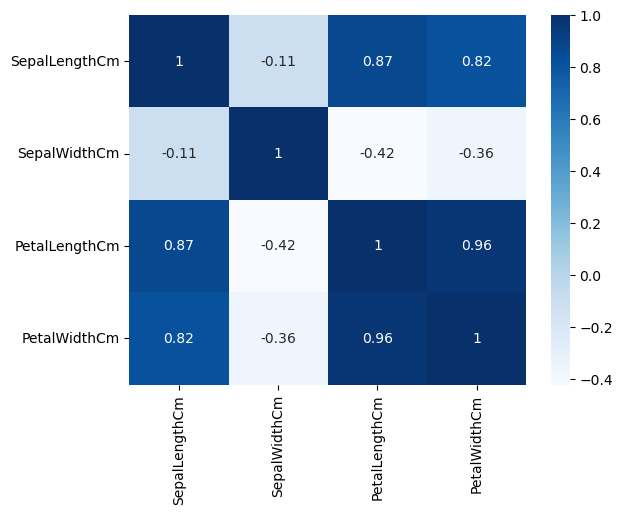

In [79]:
sns.heatmap(correlation,xticklabels =correlation.columns, yticklabels = correlation.columns, annot = True, cmap = 'Blues')
plt.show()

From the above Heat map it is evident that there is a strong positive correlation between Petal Length (cm) and Sepal Length (cm), and a weak negative correlation between Mofe and Sep In summary, there is a positive correlation between Width (cm) and Petal Width (cm) with Sepal Length (cm) and a less significant negative correlation between the two.

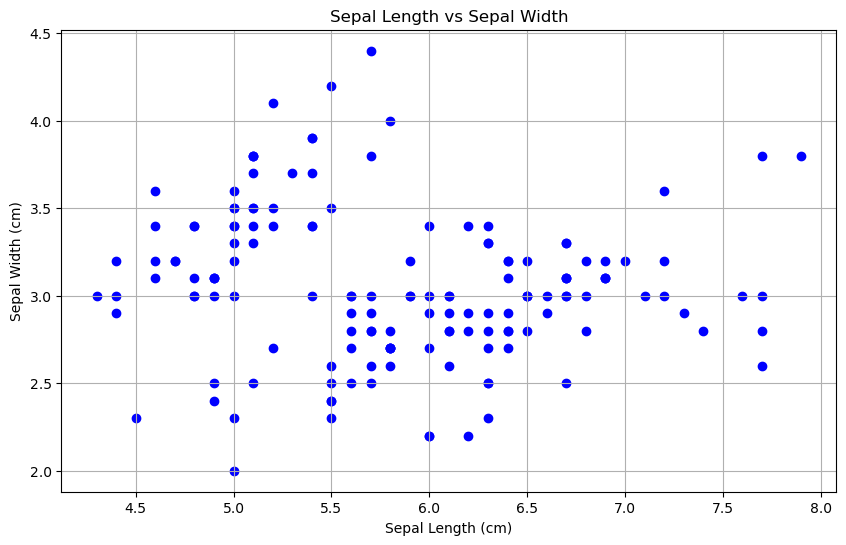

In [80]:
# Visualizing the data
plt.figure(figsize=(10, 6))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c='blue')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()

All things considered, the scatter plot indicates that the dataset most likely comprises three separate iris species or variations, each with a distinctive range of measurements for sepal length and width. Based on these two feature variables, the clustering pattern seen in the plot may help identify or classify the various species.

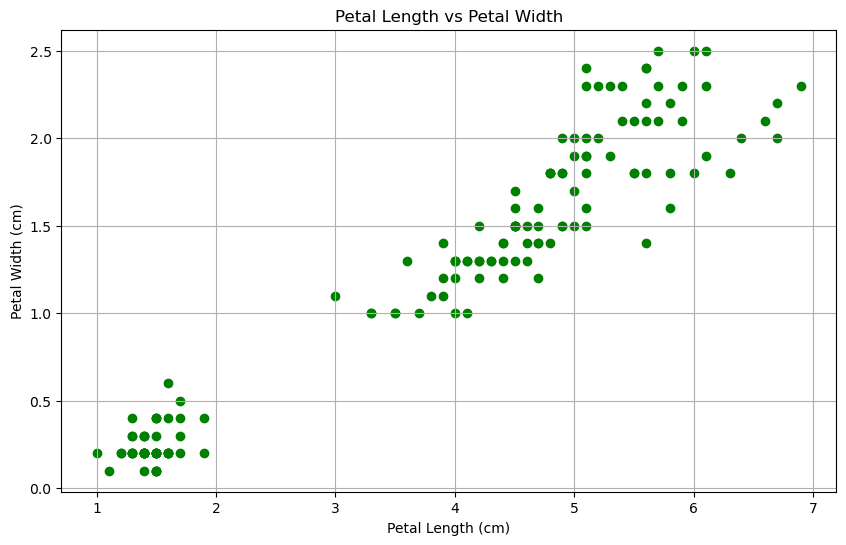

In [81]:
# Visualizing the data
plt.figure(figsize=(10, 6))
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c='green')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(True)
plt.show()

Overall, the scatter plot indicates that there are probably two different iris species or varieties in the sample, each with a considerably different range of measurements for petal width and length. Since these two feature variables seem to be highly separable, the clustering pattern seen in the plot may be helpful in correctly classifying or recognising the various species.

# Performing K Means. 

In [82]:
#Extractin the data.
x = data.iloc[:, [0, 1, 2, 3]].values

In [83]:
#  Finding the optimum number of clusters.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

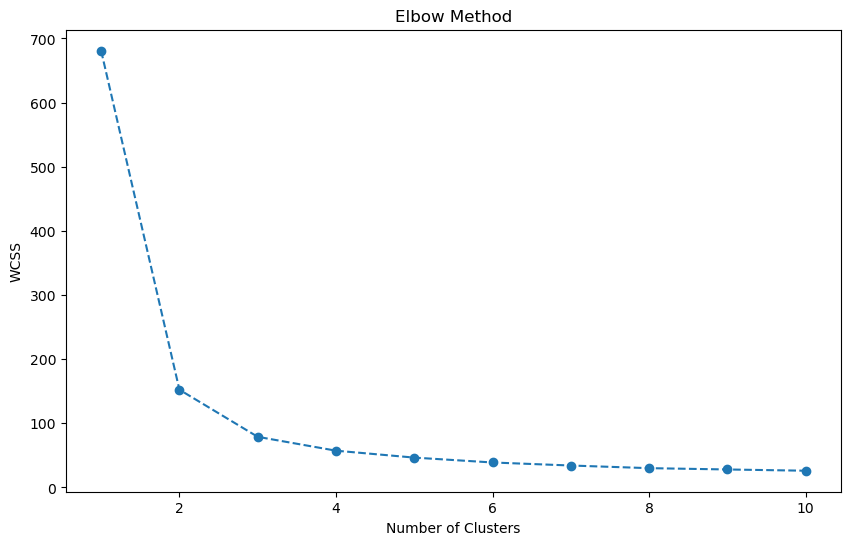

In [84]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


From the above Elbow Method we can infer that <b>3</b> is the optimum point beacuse when this occurs, there is no discernible drop in the inside cluster sum of squares (WCSS) with each repetition

In [85]:
# Let's choose it and perform clustering
optimal_num_clusters = 3
kmeans = KMeans(n_clusters = optimal_num_clusters, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

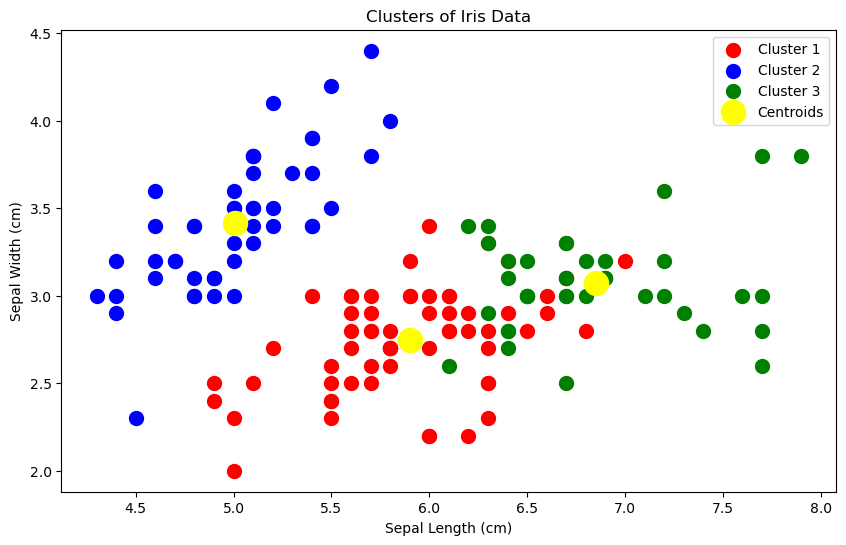

In [86]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Iris Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# Conclusion

The optimum number of cluster = 3